We want to build a decision tree whether a pet is cat or dog based on weight and height.We could divide these data points based on certain values of one of the two characteristics for example:For a weight greater than 15 lbs,we are sure that the pet is dog,atleast based on this very simple dataset

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
#create the array including the data
data = [[8,8,'dog'],[50,40,'dog'],[8,9,'cat'],[15,12,'dog'],[9,9.8,'cat']]
#generate a dataframe 
df = pd.DataFrame(data,columns = ['weight','height','label'])
df

,weight,height,label
0,8,8.0,dog
1,50,40.0,dog
2,8,9.0,cat
3,15,12.0,dog
4,9,9.8,cat


In [2]:
#defining the predictors
X = df[['weight','height']]
#defining the target 
y = df['label']

In [3]:
#initiating the model
tree = DecisionTreeClassifier()
#fitting the model
model = tree.fit(X,y)

In [4]:
tree.predict([[9,9.8]])

array(['cat'], dtype=object)

#export_graphviz function for display the tree within a jupyter notebook and it converts the decisiontree classifier into dot file and 
#pydotplus convert this dot file into png or displayable form on jupyter

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\externals\six.py:31: DeprecationWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", DeprecationWarning)


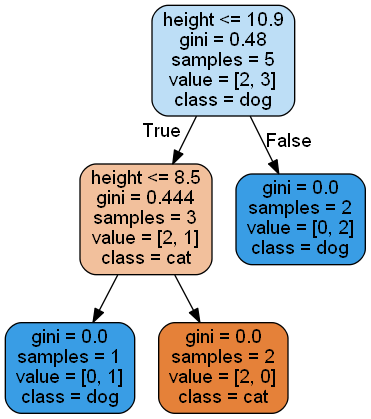

In [5]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus
from IPython.display import Image
dot_data = StringIO()
export_graphviz(model,out_file=dot_data,
                filled = True,rounded = True,
                feature_names = X.columns,
                class_names=["cat","dog"])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

criterion :optional default = "gini" or choose attribute selection measure.This parameter allows us to use the attribute selection measure,criterion = "entropy"

splitter: It defines the strategy to choose the split at each node. Supports “best” value to choose the best split & “random” to choose the best random split. By default, it takes “best” value.

max_features: It defines the no. of features to consider when looking for the best split. We can input integer, float, string & None value.

If an integer is inputted then it considers that value as max features at each split.
If float value is taken then it shows the percentage of features at each split.
If “auto” or “sqrt” is taken then max_features=sqrt(n_features).
If “log2” is taken then max_features= log2(n_features).
If None, then max_features=n_features. By default, it takes “None” value.

max_depth: The max_depth parameter denotes maximum depth of the tree. It can take any integer value or None. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. By default, it takes “None” value.

min_samples_split: This tells above the minimum no. of samples reqd. to split an internal node. If an integer value is taken then consider min_samples_split as the minimum no. If float, then it shows percentage. By default, it takes “2” value.

min_samples_leaf: The minimum number of samples required to be at a leaf node. If an integer value is taken then consider min_samples_leaf as the minimum no. If float, then it shows percentage. By default, it takes “1” value.

max_leaf_nodes: It defines the maximum number of possible leaf nodes. If None then it takes an unlimited number of leaf nodes. By default, it takes “None” value.

min_impurity_split: It defines the threshold for early stopping tree growth. A node will split if its impurity is above the threshold otherwise it is a leaf.

#Zoo Animal Classification 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
#Read the data
animal = pd.read_csv("zoo.csv")
animal

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,wallaby,1,0,0,1,0,0,0,1,1,1,0,0,2,1,0,1,1
97,wasp,1,0,1,0,1,0,0,0,0,1,1,0,6,0,0,0,6
98,wolf,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1
99,worm,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,7


In [8]:
animal.describe()

,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
count,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,0.425743,0.198020,0.584158,0.405941,0.237624,0.356436,0.554455,0.603960,0.821782,0.792079,0.079208,0.168317,2.841584,0.742574,0.128713,0.435644,2.831683
std,0.496921,0.400495,0.495325,0.493522,0.427750,0.481335,0.499505,0.491512,0.384605,0.407844,0.271410,0.376013,2.033385,0.439397,0.336552,0.498314,2.102709
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,2.000000
75%,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,4.000000,1.000000,0.000000,1.000000,4.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000,1.000000,1.000000,1.000000,7.000000


In [9]:
#Data Preprocessing
#check if there is null value
animal.isnull().sum()

animal_name    0
hair           0
feathers       0
eggs           0
milk           0
airborne       0
aquatic        0
predator       0
toothed        0
backbone       0
breathes       0
venomous       0
fins           0
legs           0
tail           0
domestic       0
catsize        0
class_type     0
dtype: int64

In [10]:
print(animal.class_type.unique())

[1 4 2 7 6 5 3]


In [11]:
duplicates = animal.duplicated()
duplicates[duplicates>1]

Series([], dtype: bool)

In [12]:
#check if there are duplicates in animal_name
duplicates = animal.animal_name.value_counts()
duplicates[duplicates>1]

frog    2
Name: animal_name, dtype: int64

In [13]:
#to see the data
frog = animal.loc[animal['animal_name']=='frog']
frog

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5


In [14]:
#join animal table and class table to show actual class names
ani_class = pd.read_csv("class.csv")
df = pd.merge(animal,ani_class,how = 'left',left_on ='class_type',
              right_on = 'Class_Number')
df.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,...,fins,legs,tail,domestic,catsize,class_type,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,aardvark,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,antelope,1,0,0,1,0,0,0,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
2,bass,0,0,1,0,0,1,1,1,1,...,1,0,1,0,0,4,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
3,bear,1,0,0,1,0,0,1,1,1,...,0,4,0,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
4,boar,1,0,0,1,0,0,1,1,1,...,0,4,1,0,1,1,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."


C:\Users\Administrator\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


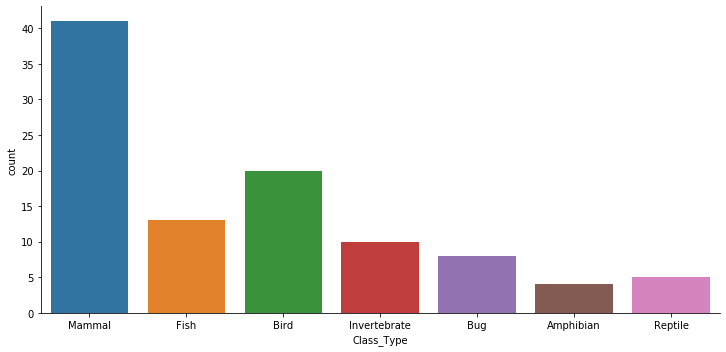

In [15]:
#to plot the number of each class_type
sns.factorplot('Class_Type',data = df,kind = 'count',height = 5,aspect = 2)

In [20]:
#train test split
from sklearn.model_selection import train_test_split
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,
                                                 random_state =1)

In [21]:
#Decision Tree Classification
from sklearn.tree import export_graphviz
from pydotplus import graph_from_dot_data
from IPython.display import Image
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

#Declare and train the model
clf = DecisionTreeClassifier(random_state = 1,criterion = 'gini')
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
score = accuracy_score(y_pred,y_test)
print(score)

0.9523809523809523


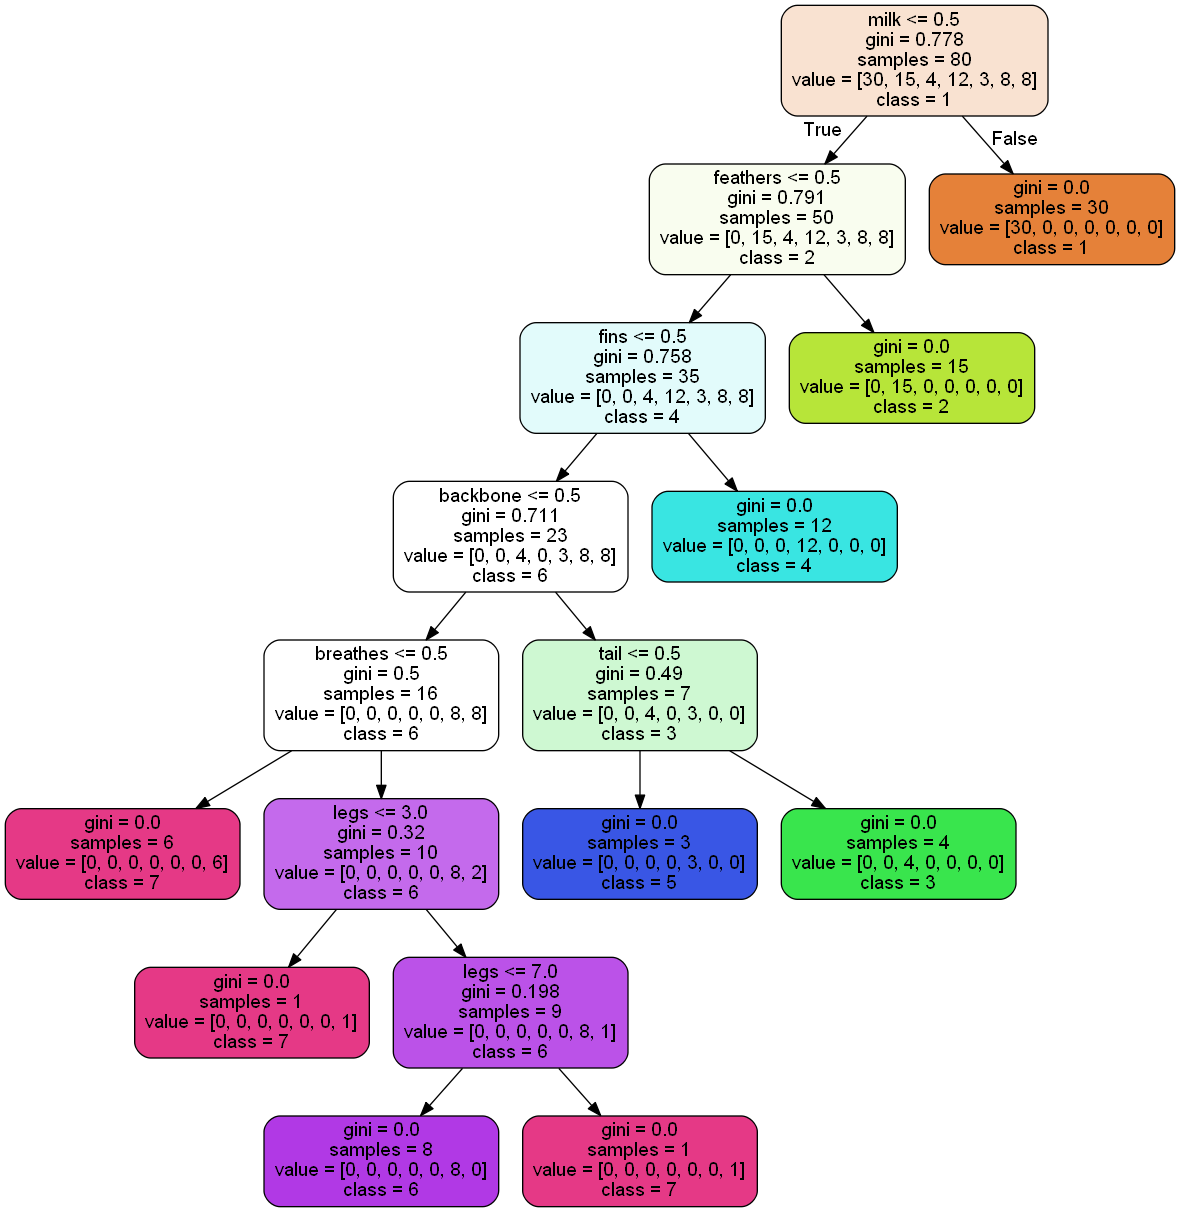

In [23]:
dot_data = StringIO()
export_graphviz(clf,out_file=dot_data,
                filled = True,rounded = True,
                feature_names = X.columns,
                class_names=['1','2','3','4','5','6','7'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [28]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_pred,y_test)

array([[11,  0,  0,  0,  0,  0],
       [ 0,  5,  0,  0,  0,  0],
       [ 0,  0,  1,  0,  1,  0],
       [ 0,  0,  0,  1,  0,  0],
       [ 0,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2]], dtype=int64)

In [3]:
from sklearn.tree import DecisionTreeRegressor

In [10]:
X = animal.iloc[:,1:17]
y = animal.iloc[:,17]
tree_reg = DecisionTreeRegressor(max_depth =2)
tree_reg.fit(X,y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [11]:
tree_reg.score(X,y)

0.8854593207759636

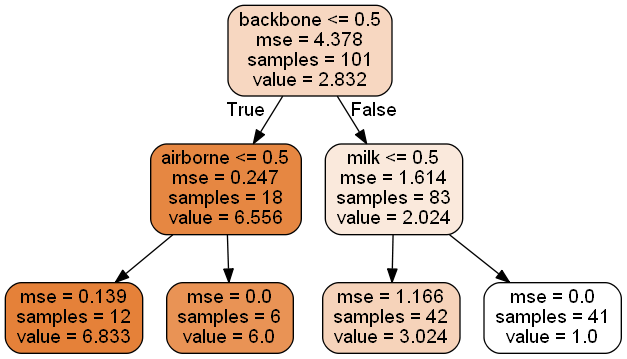

In [12]:
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
from  pydotplus import graph_from_dot_data
from IPython.display import Image
dot_data = StringIO()
export_graphviz(tree_reg,out_file=dot_data,
                filled = True,rounded = True,
                feature_names = X.columns,
                class_names=['1','2','3','4','5','6','7'])
graph = graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())